## Decision Tree Algorithm

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

##### Importing dataset

In [42]:
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [74]:
telco_arr = np.array(telco.columns)
telco_arr

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

#### Data Analysis

In [44]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [76]:
len_col_telco = len(telco_arr)
print("Column Name : No. of unique value")
print("---------------------------------")
for i in range(1,len_col_telco):
    val = len(np.unique(telco[telco_arr[i]]))
    print(telco_arr[i],":",val)

Column Name : No. of unique value
---------------------------------
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6531
Churn : 2


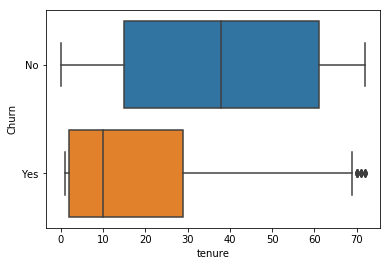

In [46]:
sns.boxplot('tenure','Churn',data=telco)

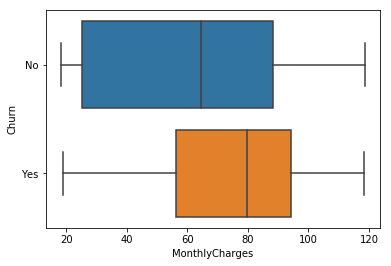

In [47]:
sns.boxplot('MonthlyCharges','Churn',data=telco)

#### droping of useless columns

In [89]:
df = telco.drop(['customerID','tenure','MonthlyCharges','TotalCharges','Contract','Churn'],axis=1)
df2 = telco.drop(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'TotalCharges', 'Churn'],axis=1)
y = telco['Churn']
print(df2.head(5))
df.head(5)

   tenure  MonthlyCharges
0       1           29.85
1      34           56.95
2       2           53.85
3      45           42.30
4       2           70.70


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check


##### Object to numpy array conversion

In [90]:
df_arr = np.array(df.columns)
df_arr

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
      dtype=object)

#### taking dummies and droping useless columns

In [91]:
len_col_df = len(df_arr)
for i in range(len_col_df):
    req_col = df_arr[i]
    req_col = pd.get_dummies(df[req_col],drop_first=True)
    df.drop(df_arr[i],axis=1,inplace=True)
    df = pd.concat([df,req_col],axis=1)
df.head()

,Male,1,Yes,Yes,Yes,No phone service,Yes,Fiber optic,No,No internet service,...,No internet service,Yes,No internet service,Yes,No internet service,Yes,Yes,Credit card (automatic),Electronic check,Mailed check
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [93]:
np.array(df.columns)

array(['Male', 1, 'Yes', 'Yes', 'Yes', 'No phone service', 'Yes',
       'Fiber optic', 'No', 'No internet service', 'Yes',
       'No internet service', 'Yes', 'No internet service', 'Yes',
       'No internet service', 'Yes', 'No internet service', 'Yes',
       'No internet service', 'Yes', 'Yes', 'Credit card (automatic)',
       'Electronic check', 'Mailed check'], dtype=object)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
Male                       7043 non-null uint8
1                          7043 non-null uint8
Yes                        7043 non-null uint8
Yes                        7043 non-null uint8
Yes                        7043 non-null uint8
No phone service           7043 non-null uint8
Yes                        7043 non-null uint8
Fiber optic                7043 non-null uint8
No                         7043 non-null uint8
No internet service        7043 non-null uint8
Yes                        7043 non-null uint8
No internet service        7043 non-null uint8
Yes                        7043 non-null uint8
No internet service        7043 non-null uint8
Yes                        7043 non-null uint8
No internet service        7043 non-null uint8
Yes                        7043 non-null uint8
No internet service        7043 non-null uint8
Yes                        7043 non-null uint8


#### Making the data scaled¶

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [98]:
scaler.fit(df2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [99]:
scaler_features = scaler.transform(df2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


#### Converting the scaled data into pandas dataframe

In [103]:
scaler_df = pd.DataFrame(scaler_features)

#### Joining of two pandas DataFrame 

In [105]:
X = pd.concat([df,scaler_df],axis=1)
X.head()

,Male,1,Yes,Yes,Yes,No phone service,Yes,Fiber optic,No,No internet service,...,No internet service,Yes,No internet service,Yes,Yes,Credit card (automatic),Electronic check,Mailed check,0,1
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,-1.277445,-1.160323
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0.066327,-0.259629
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,-1.236724,-0.362660
3,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0.514251,-0.746535
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,1,0,-1.236724,0.197365


#### Taking dummy value for target column

In [107]:
Y = pd.get_dummies(y,drop_first=True)
Y.head()

,Yes
0,0
1,0
2,1
3,0
4,1


#### Spliting of Training and testing dataset

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Training of the model with the help of CART(Gini Index) Algorithm

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
dtree = DecisionTreeClassifier()

In [112]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Predictions

In [113]:
predictions = dtree.predict(X_test)

In [114]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [115]:
cla_CART = classification_report(y_test,predictions)
print("Classification Report:\n\n",cla_CART)

Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1539
           1       0.51      0.52      0.51       574

   micro avg       0.73      0.73      0.73      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [116]:
con_CART = confusion_matrix(y_test,predictions)
print("Confusion matrix:\n\n",con_CART)

Confusion matrix:

 [[1252  287]
 [ 277  297]]


In [118]:
acc_CART = accuracy_score(y_test,predictions)*100
print("Accuracy:",acc_CART,"%")

Accuracy: 73.30809275911027 %


### Training of the model with the help of ID3(Entropy) Algorithm

In [119]:
dtree = DecisionTreeClassifier(criterion='entropy')

In [120]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Prediction for ID3

In [121]:
predictions = dtree.predict(X_test)

In [122]:
cla_ID3 = classification_report(y_test,predictions)
print("Classification Report:\n\n",cla_ID3)

Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1539
           1       0.51      0.52      0.51       574

   micro avg       0.73      0.73      0.73      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.73      0.73      0.73      2113



In [123]:
con_ID3 = confusion_matrix(y_test,predictions)
print("Confusion matrix:\n\n",con_ID3)

Confusion matrix:

 [[1249  290]
 [ 276  298]]


In [124]:
acc_ID3 = accuracy_score(y_test,predictions)*100
print("Accuracy:",acc_ID3,"%")

Accuracy: 73.21344060577378 %
